#Import Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, balanced_accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Function

In [ ]:
def label_encoding(data):
    data['Label'].replace(['negative', 'positive'], [0, 1], inplace=True)
    X = data.drop(columns=['Label']).values
    y = data['Label'].values
    return X, y


In [ ]:
def plot_label_distribution(y):
    # Get unique values and their counts
    unique_values, counts = np.unique(y, return_counts=True)

    # Map labels to colors
    colors = ['teal', 'orange']  # Change the colors as desired

    # Create the bar graph
    plt.bar(unique_values, counts, color=colors)

    # Set labels and title
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.title('Label Distribution')

    # Customize x-axis tick labels
    plt.xticks(unique_values, ['0', '1'])

    # Add count values as text annotations
    for i, count in enumerate(counts):
        plt.text(unique_values[i], count, str(count), ha='center', va='bottom')

    # Show the plot
    plt.show()

    # Print label counts
    print("Label Counts:")
    print("0:", np.sum(y == 0))
    print("1:", np.sum(y == 1))

In [ ]:
def random_forest_classifier(X_train, y_train, X_test, y_test):
    # Create a Random Forest Classifier
    rf_classifier = RandomForestClassifier(random_state=42)

    # Train the classifier
    rf_classifier.fit(X_train, y_train)

    # Predict probabilities for train set
    y_train_pred_prob = rf_classifier.predict_proba(X_train)[:, 1]

    # Calculate train ROC AUC
    train_roc_auc = roc_auc_score(y_train, y_train_pred_prob)
    print("Train ROC AUC:", train_roc_auc)

    # Predict classes for test set
    y_test_pred = rf_classifier.predict(X_test)

    # Calculate test confusion matrix
    test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

    print("Test Datasets")
    # Plot confusion matrix as a heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(test_confusion_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Calculate sensitivity (recall), specificity, precision, f1-score
    tn, fp, fn, tp = test_confusion_matrix.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    f1score = 2 * (precision * sensitivity) / (precision + sensitivity)

    # Calculate geometric mean
    geometric_mean = (sensitivity * specificity) ** 0.5

    # Calculate balanced accuracy
    balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)

    # Print the additional performance metrics
    print("Sensitivity (Recall):", sensitivity)
    print("Specificity:", specificity)
    print("Precision:", precision)
    print("F1-Score:", f1score)
    print("Geometric Mean:", geometric_mean)
    print("Balanced Accuracy:", balanced_accuracy)

    # Store metrics in a dictionary
    metrics = {
        'Train ROC AUC': train_roc_auc,
        'Test Confusion Matrix': test_confusion_matrix,
        'Sensitivity (Recall)': sensitivity,
        'Specificity': specificity,
        'Precision': precision,
        'F1-Score': f1score,
        'Geometric Mean': geometric_mean,
        'Balanced Accuracy': balanced_accuracy
    }

    return metrics


In [ ]:
def plot_pca_tsne_visualizations(X, y):
    # Perform PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # Create a DataFrame with PCA results and the corresponding labels
    pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
    pca_df['Label'] = y

    # Count occurrences of each label for PCA
    pca_label_counts = pca_df['Label'].value_counts()

    # Perform t-SNE on the PCA-transformed data
    tsne = TSNE(n_components=2)
    X_tsne = tsne.fit_transform(X_pca)

    # Create a DataFrame with t-SNE results and the corresponding labels
    tsne_df = pd.DataFrame(X_tsne, columns=['t-SNE Dimension 1', 't-SNE Dimension 2'])
    tsne_df['Label'] = y

    # Count occurrences of each label for t-SNE
    tsne_label_counts = tsne_df['Label'].value_counts()

    # Create subplots with a 1x2 grid
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot PCA distribution with different colors for each label
    axes[0].scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Label'], cmap='coolwarm')
    axes[0].set_xlabel('Principal Component 1')
    axes[0].set_ylabel('Principal Component 2')
    axes[0].set_title('PCA Distribution with Labels')

    # Plot t-SNE visualization with different colors for each label
    axes[1].scatter(tsne_df['t-SNE Dimension 1'], tsne_df['t-SNE Dimension 2'], c=tsne_df['Label'], cmap='coolwarm')
    axes[1].set_xlabel('t-SNE Dimension 1')
    axes[1].set_ylabel('t-SNE Dimension 2')
    axes[1].set_title('t-SNE Visualization of PCA-Transformed Data')

    # Add colorbars to the figure
    fig.colorbar(axes[0].scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Label'], cmap='coolwarm'), ax=axes[0])
    fig.colorbar(axes[1].scatter(tsne_df['t-SNE Dimension 1'], tsne_df['t-SNE Dimension 2'], c=tsne_df['Label'], cmap='coolwarm'), ax=axes[1])

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()

    # Print the count of negative and positive labels for PCA and t-SNE
    print('PCA Label Counts:')
    print(pca_label_counts)
    print('\n')
    print('t-SNE Label Counts:')
    print(tsne_label_counts)


In [ ]:
def smote(X_train, y_train):
    # Apply SMOTE to the training data
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    return X_train_resampled, y_train_resampled

In [ ]:
def adasyn(X_train,y_train):
    # Apply ADASYN to the training data
    adasyn = ADASYN(random_state=42,n_neighbors = 2)
    X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

    return X_train_resampled, y_train_resampled


#IR 9.15

##Read Data


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/TA_datasets/datatest/IR9.15.xlsx')

##Train test split

In [ ]:
X,y = label_encoding(data)

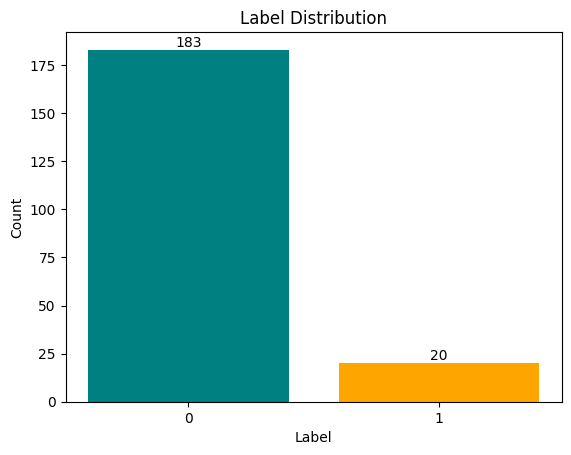

Label Counts:
0: 183
1: 20


In [ ]:
plot_label_distribution(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##BASE

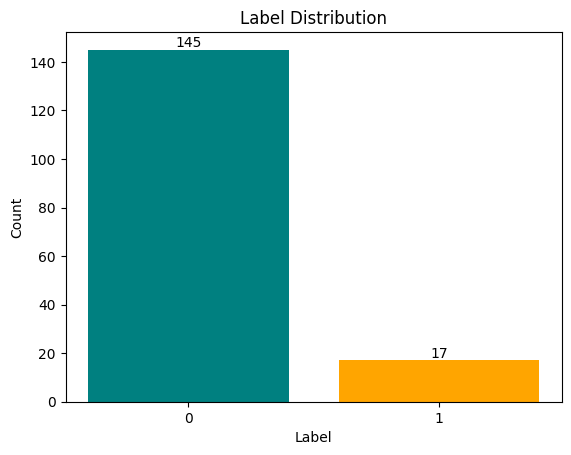

Label Counts:
0: 145
1: 17


In [ ]:
plot_label_distribution(y_train)

###Imbalance PCA - TSNE

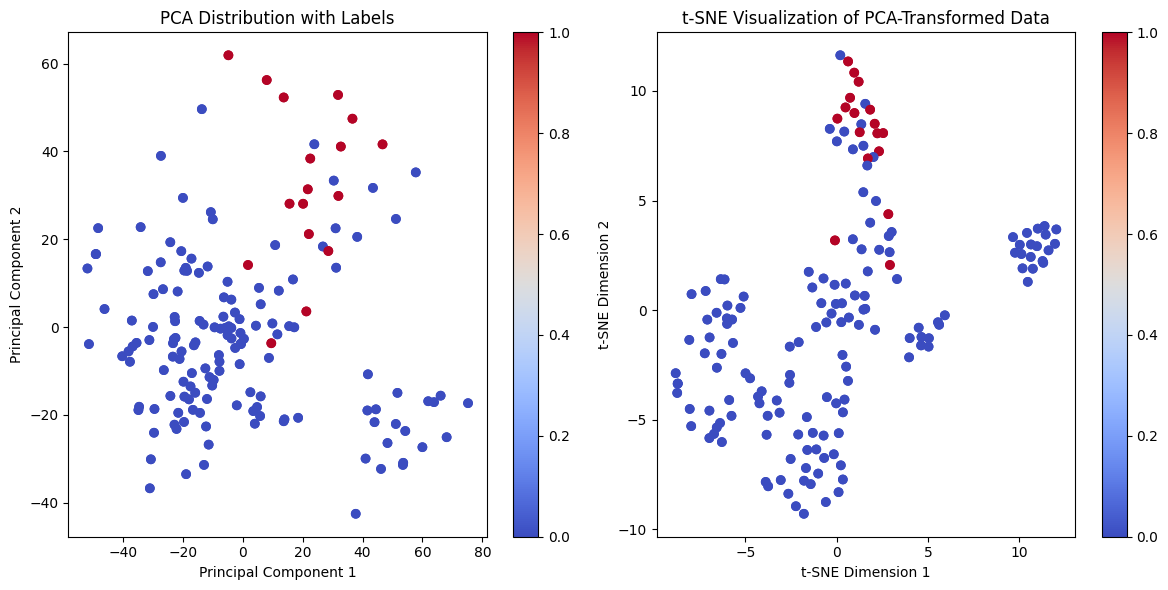

In [ ]:
plot_pca_tsne_visualizations(X_train,y_train)

###Klasifikasi Imbalance

PCA Label Counts:
0    145
1     17
Name: Label, dtype: int64


t-SNE Label Counts:
0    145
1     17
Name: Label, dtype: int64
Train ROC AUC: 1.0
Test Datasets


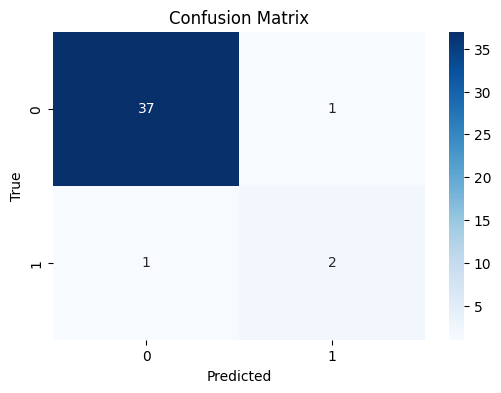

Sensitivity (Recall): 0.6666666666666666
Specificity: 0.9736842105263158
Precision: 0.6666666666666666
F1-Score: 0.6666666666666666
Geometric Mean: 0.8056815791722831
Balanced Accuracy: 0.8201754385964912


In [ ]:
metrics = random_forest_classifier(X_train, y_train, X_test, y_test)

train_roc_auc_imb_ds1 =  metrics['Train ROC AUC']
test_confusion_matrix_imb_ds1 =  metrics['Test Confusion Matrix']
sensitivity_imb_ds1 =  metrics['Sensitivity (Recall)']
specificity_imb_ds1 =  metrics['Specificity']
precision_imb_ds1 =  metrics['Precision']
f1score_imb_ds1 =  metrics['F1-Score']
geometric_mean_imb_ds1 =  metrics['Geometric Mean']
balanced_accuracy_imb_ds1 =  metrics['Balanced Accuracy']

##Klasifikasi Balance

###SMOTE

In [ ]:
X_train_resampled, y_train_resampled = smote(X_train,y_train)

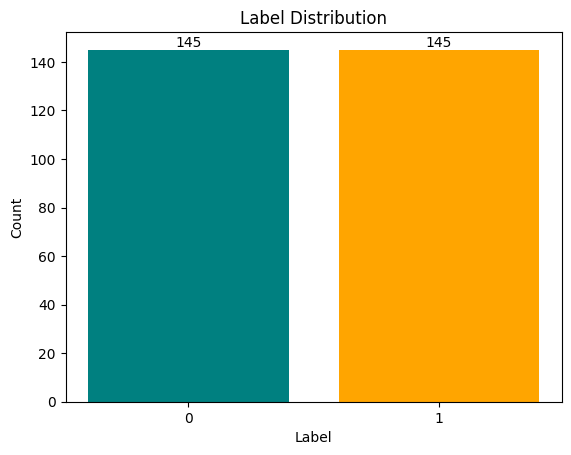

Label Counts:
0: 145
1: 145


In [ ]:
plot_label_distribution(y_train_resampled)

####Smote PCA-TSNE

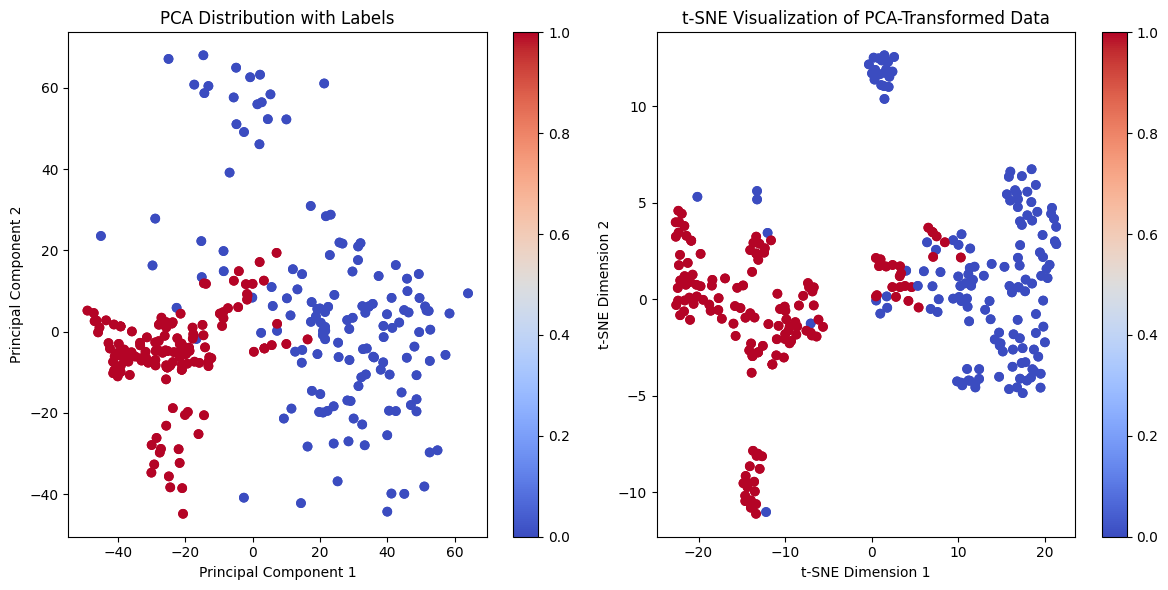

PCA Label Counts:
1    145
0    145
Name: Label, dtype: int64


t-SNE Label Counts:
1    145
0    145
Name: Label, dtype: int64


In [ ]:
plot_pca_tsne_visualizations(X_train_resampled, y_train_resampled)

####Klasifikasi SMOTE

Train ROC AUC: 1.0
Test Datasets


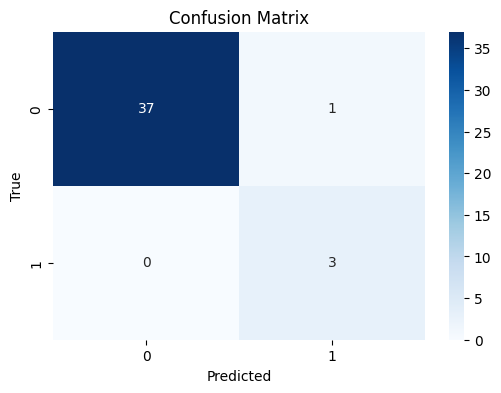

Sensitivity (Recall): 1.0
Specificity: 0.9736842105263158
Precision: 0.75
F1-Score: 0.8571428571428571
Geometric Mean: 0.9867543820659302
Balanced Accuracy: 0.986842105263158


In [ ]:
metrics = random_forest_classifier(X_train_resampled, y_train_resampled, X_test, y_test)


train_roc_auc_smt_ds1 = metrics['Train ROC AUC']
test_confusion_matrix_smt_ds1 = metrics['Test Confusion Matrix']
sensitivity_smt_ds1 = metrics['Sensitivity (Recall)']
specificity_smt_ds1 = metrics['Specificity']
precision_smt_ds1 = metrics['Precision']
f1score_smt_ds1 = metrics['F1-Score']
geometric_mean_smt_ds1 = metrics['Geometric Mean']
balanced_accuracy_smt_ds1 = metrics['Balanced Accuracy']

###ADASYN

In [ ]:
X_train_resampled, y_train_resampled = adasyn(X_train,y_train)

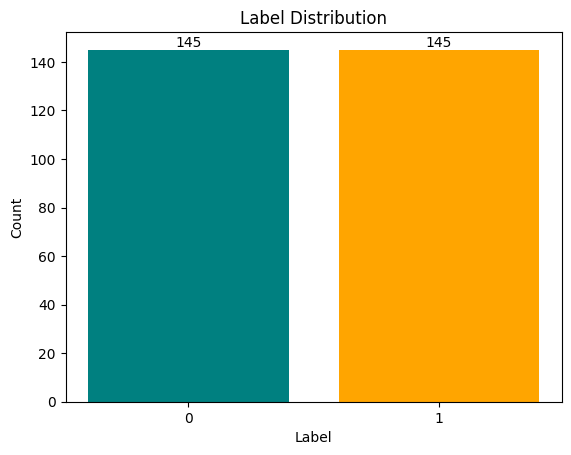

Label Counts:
0: 145
1: 145


In [ ]:
plot_label_distribution(y_train_resampled)

####ADASYN PCA-TSNE

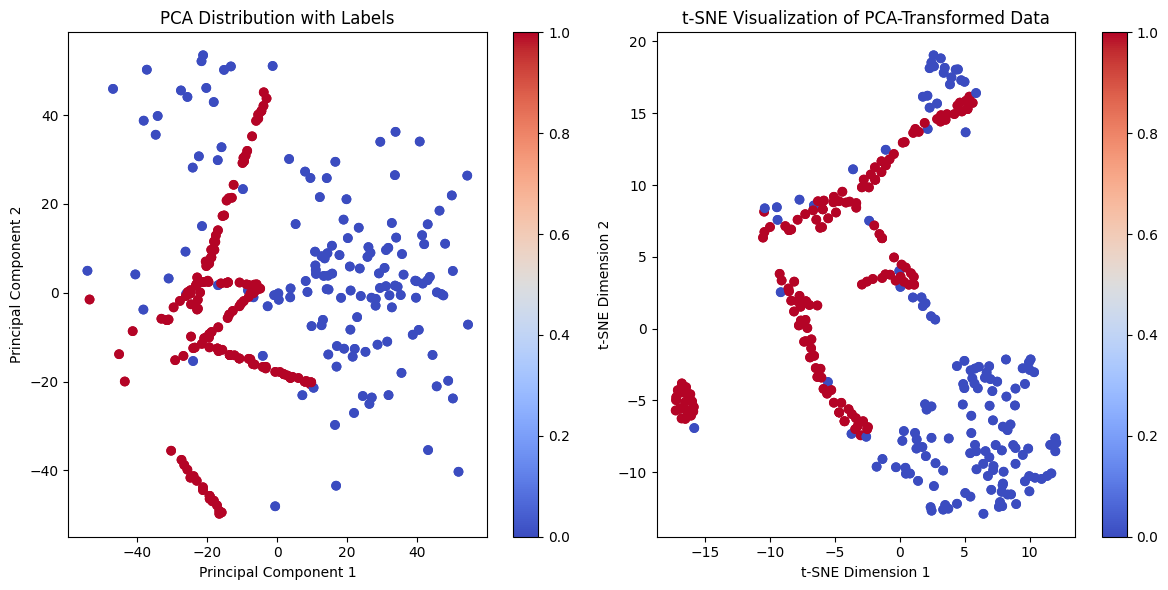

PCA Label Counts:
1    145
0    145
Name: Label, dtype: int64


t-SNE Label Counts:
1    145
0    145
Name: Label, dtype: int64


In [ ]:
plot_pca_tsne_visualizations(X_train_resampled, y_train_resampled)

####Klasifikasi ADASYN

Train ROC AUC: 1.0
Test Datasets


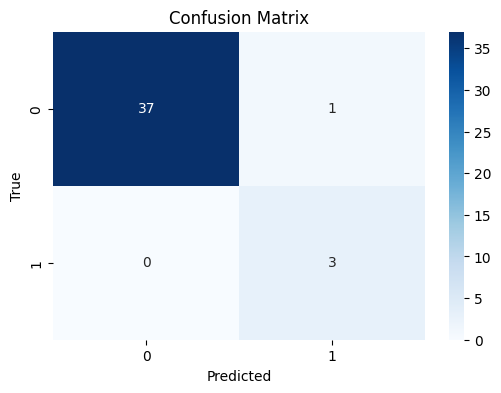

Sensitivity (Recall): 1.0
Specificity: 0.9736842105263158
Precision: 0.75
F1-Score: 0.8571428571428571
Geometric Mean: 0.9867543820659302
Balanced Accuracy: 0.986842105263158


In [ ]:
metrics = random_forest_classifier(X_train_resampled, y_train_resampled, X_test, y_test)


train_roc_auc_ada_ds1 = metrics['Train ROC AUC']
test_confusion_matrix_ada_ds1 = metrics['Test Confusion Matrix']
sensitivity_ada_ds1 = metrics['Sensitivity (Recall)']
specificity_ada_ds1 = metrics['Specificity']
precision_ada_ds1 = metrics['Precision']
f1score_ada_ds1 = metrics['F1-Score']
geometric_mean_ada_ds1 = metrics['Geometric Mean']
balanced_accuracy_ada_ds1 = metrics['Balanced Accuracy']

#IR 10

##Read Data


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/TA_datasets/datatest/IR10.xlsx')

##Train test split

In [ ]:
X,y = label_encoding(data)

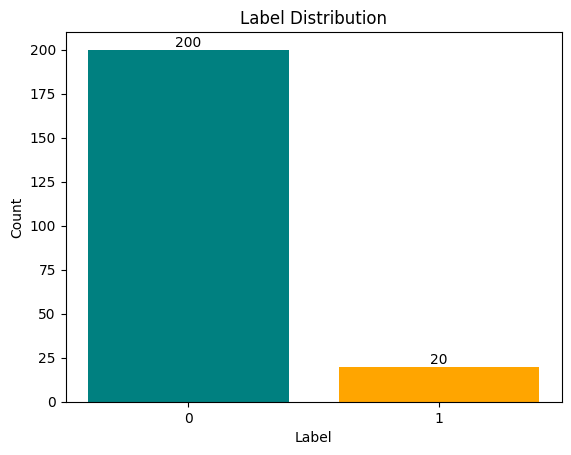

Label Counts:
0: 200
1: 20


In [ ]:
plot_label_distribution(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##BASE

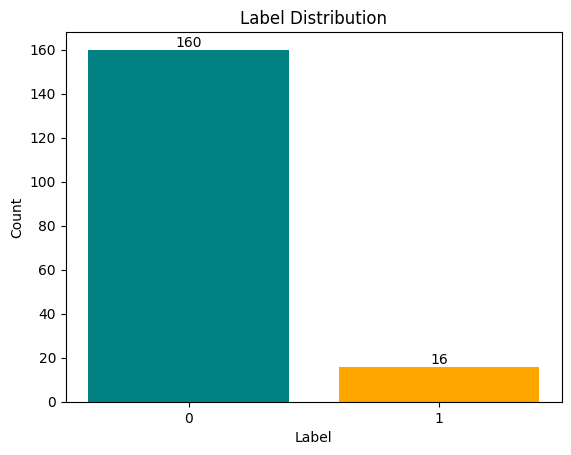

Label Counts:
0: 160
1: 16


In [ ]:
plot_label_distribution(y_train)

###Imbalance PCA - TSNE

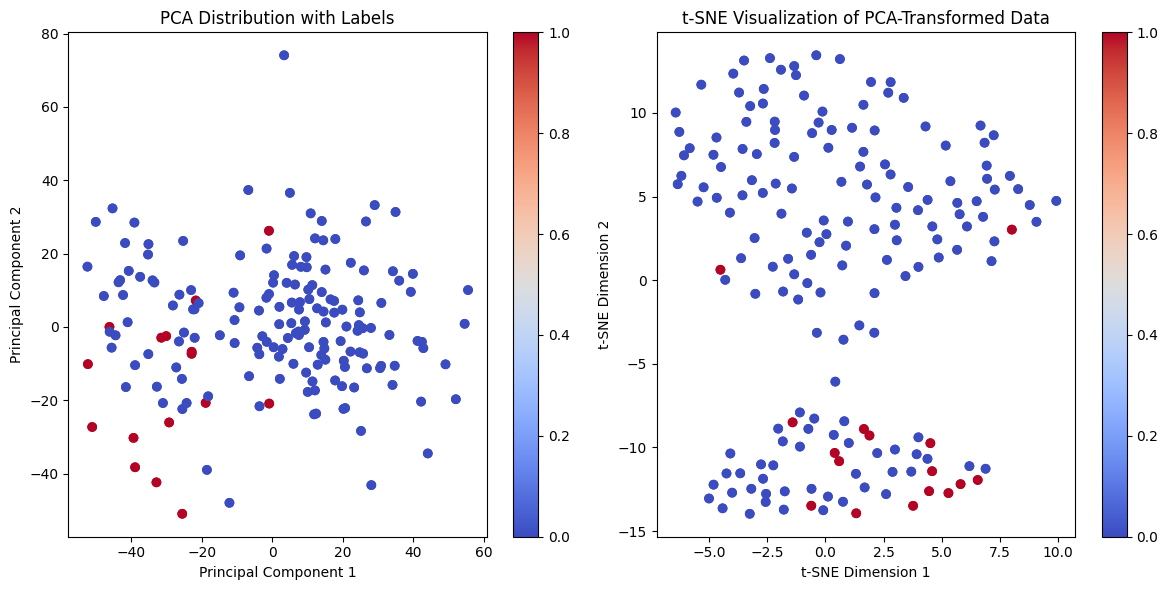

PCA Label Counts:
0    160
1     16
Name: Label, dtype: int64


t-SNE Label Counts:
0    160
1     16
Name: Label, dtype: int64


In [ ]:
plot_pca_tsne_visualizations(X_train,y_train)

###Klasifikasi Imbalance

Train ROC AUC: 1.0
Test Datasets


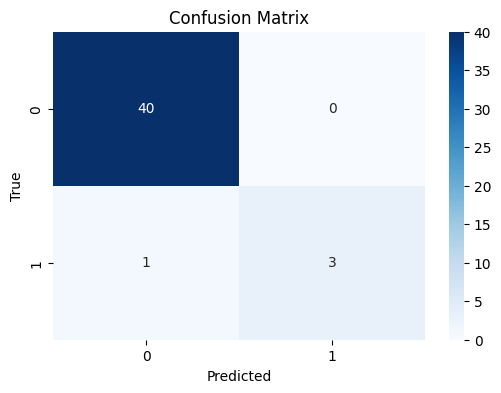

Sensitivity (Recall): 0.75
Specificity: 1.0
Precision: 1.0
F1-Score: 0.8571428571428571
Geometric Mean: 0.8660254037844386
Balanced Accuracy: 0.875


In [ ]:
metrics = random_forest_classifier(X_train, y_train, X_test, y_test)

train_roc_auc_imbds2 = metrics['Train ROC AUC']
test_confusion_matrix_imbds2 = metrics['Test Confusion Matrix']
sensitivity_imbds2 = metrics['Sensitivity (Recall)']
specificity_imbds2 = metrics['Specificity']
precision_imbds2 = metrics['Precision']
f1score_imbds2 = metrics['F1-Score']
geometric_mean_imbds2 = metrics['Geometric Mean']
balanced_accuracy_imbds2 = metrics['Balanced Accuracy']

##Klasifikasi Balance

###SMOTE

In [ ]:
X_train_resampled, y_train_resampled = smote(X_train,y_train)

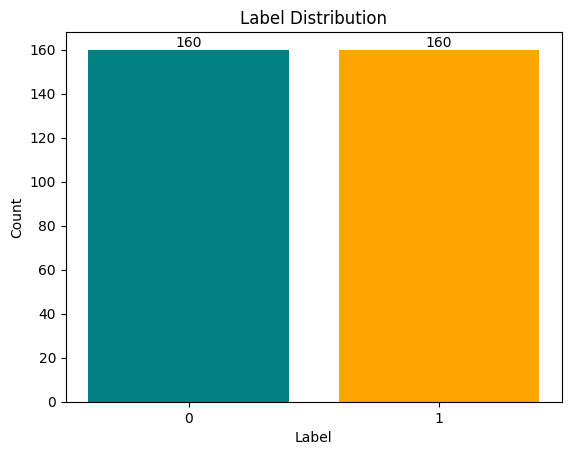

Label Counts:
0: 160
1: 160


In [ ]:
plot_label_distribution(y_train_resampled)

####Smote PCA-TSNE

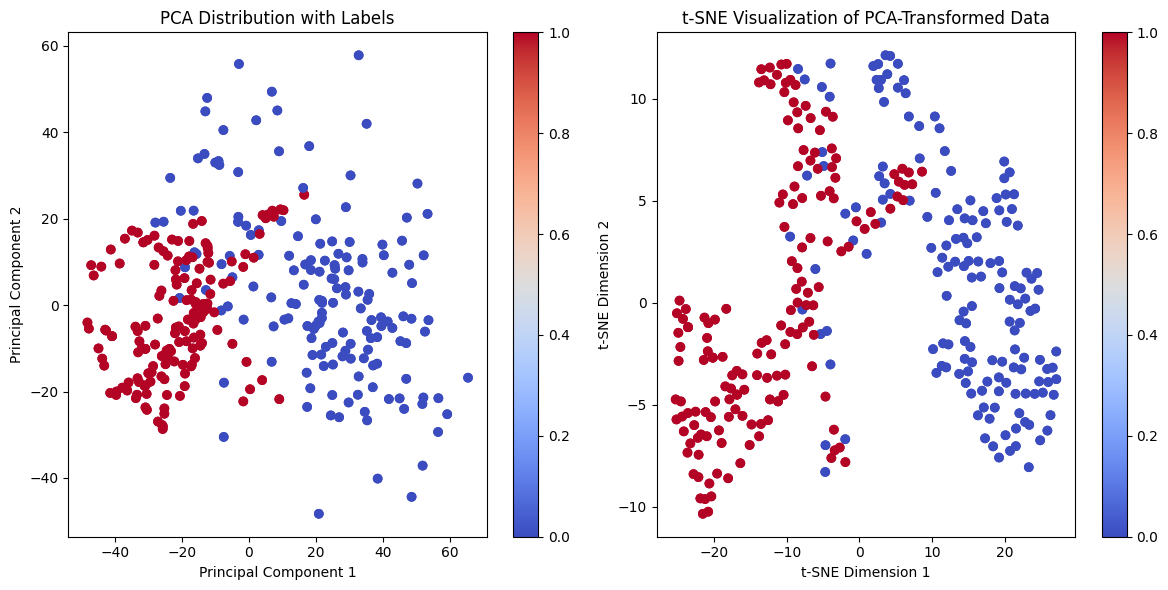

PCA Label Counts:
0    160
1    160
Name: Label, dtype: int64


t-SNE Label Counts:
0    160
1    160
Name: Label, dtype: int64


In [ ]:
plot_pca_tsne_visualizations(X_train_resampled, y_train_resampled)

####Klasifikasi SMOTE

Train ROC AUC: 1.0
Test Datasets


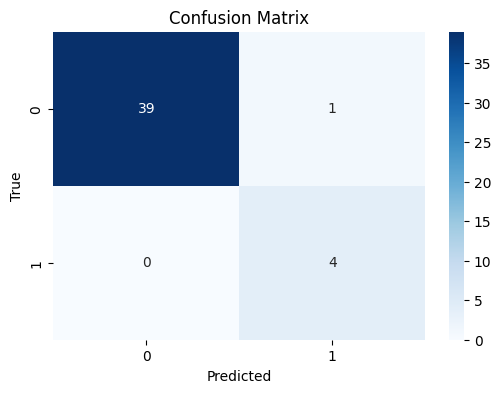

Sensitivity (Recall): 1.0
Specificity: 0.975
Precision: 0.8
F1-Score: 0.888888888888889
Geometric Mean: 0.9874208829065749
Balanced Accuracy: 0.9875


In [ ]:
metrics = random_forest_classifier(X_train_resampled, y_train_resampled, X_test, y_test)


train_roc_auc_smtds2 = metrics['Train ROC AUC']
test_confusion_matrix_smtds2 = metrics['Test Confusion Matrix']
sensitivity_smtds2 = metrics['Sensitivity (Recall)']
specificity_smtds2 = metrics['Specificity']
precision_smtds2 = metrics['Precision']
f1score_smtds2 = metrics['F1-Score']
geometric_mean_smtds2 = metrics['Geometric Mean']
balanced_accuracy_smtds2 = metrics['Balanced Accuracy']

###ADASYN

In [ ]:
X_train_resampled, y_train_resampled = adasyn(X_train,y_train)

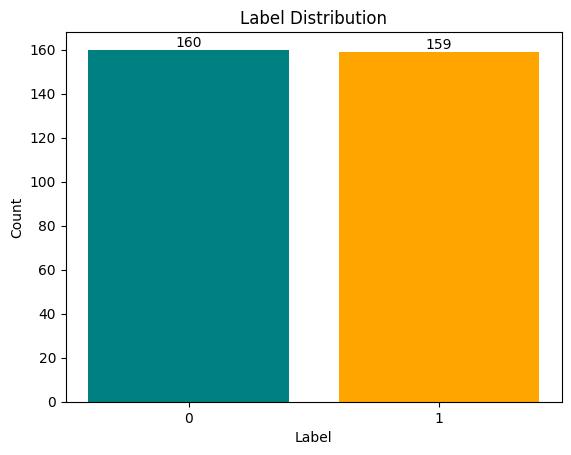

Label Counts:
0: 160
1: 159


In [ ]:
plot_label_distribution(y_train_resampled)

####ADASYN PCA-TSNE

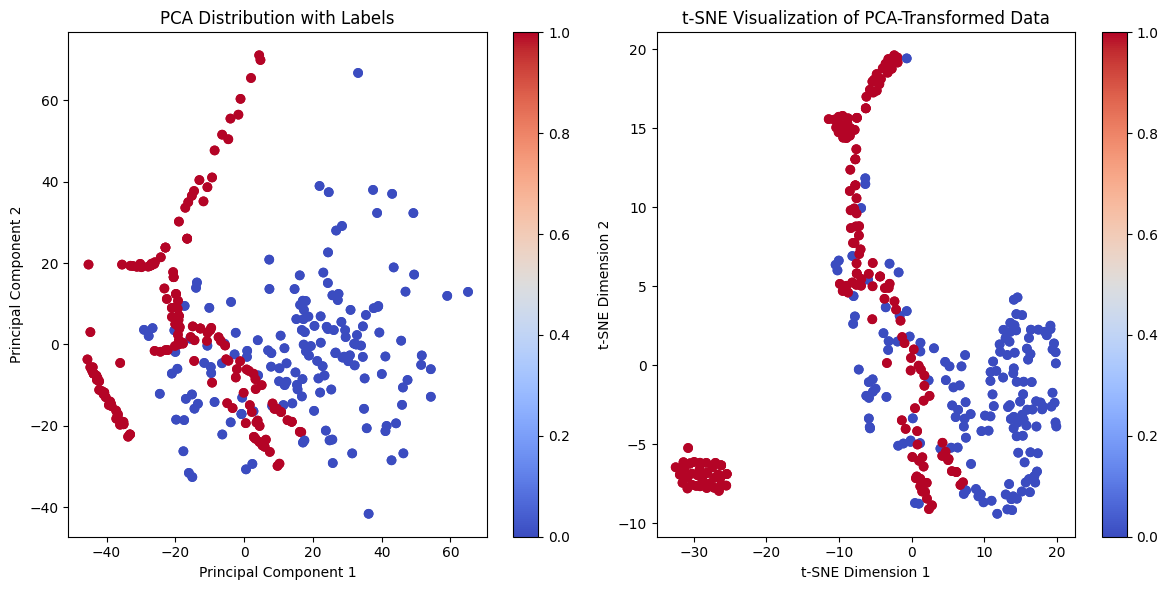

PCA Label Counts:
0    160
1    159
Name: Label, dtype: int64


t-SNE Label Counts:
0    160
1    159
Name: Label, dtype: int64


In [ ]:
plot_pca_tsne_visualizations(X_train_resampled, y_train_resampled)

####Klasifikasi ADASYN

Train ROC AUC: 1.0
Test Datasets


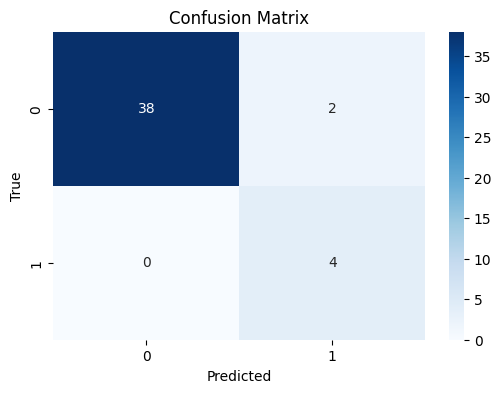

Sensitivity (Recall): 1.0
Specificity: 0.95
Precision: 0.6666666666666666
F1-Score: 0.8
Geometric Mean: 0.9746794344808963
Balanced Accuracy: 0.975


In [ ]:
metrics = random_forest_classifier(X_train_resampled, y_train_resampled, X_test, y_test)


train_roc_auc_adads2 = metrics['Train ROC AUC']
test_confusion_matrix_adads2 = metrics['Test Confusion Matrix']
sensitivity_adads2 = metrics['Sensitivity (Recall)']
specificity_adads2 = metrics['Specificity']
precision_adads2 = metrics['Precision']
f1score_adads2 = metrics['F1-Score']
geometric_mean_adads2 = metrics['Geometric Mean']
balanced_accuracy_adads2 = metrics['Balanced Accuracy']

#IR 11

##Read Data


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/TA_datasets/datatest/IR11.xlsx')

##Train test split

In [ ]:
X,y = label_encoding(data)

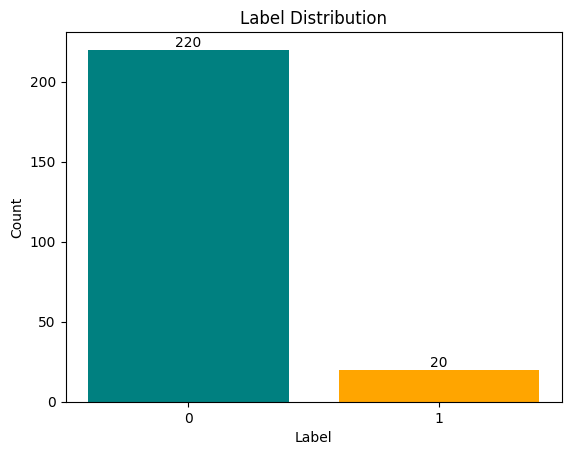

Label Counts:
0: 220
1: 20


In [ ]:
plot_label_distribution(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##BASE

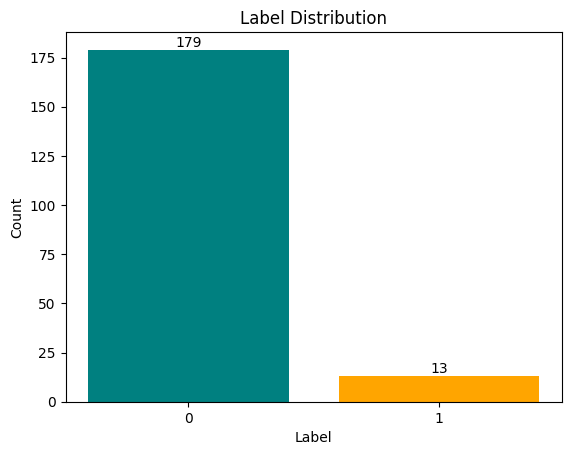

Label Counts:
0: 179
1: 13


In [ ]:
plot_label_distribution(y_train)

###Imbalance PCA - TSNE

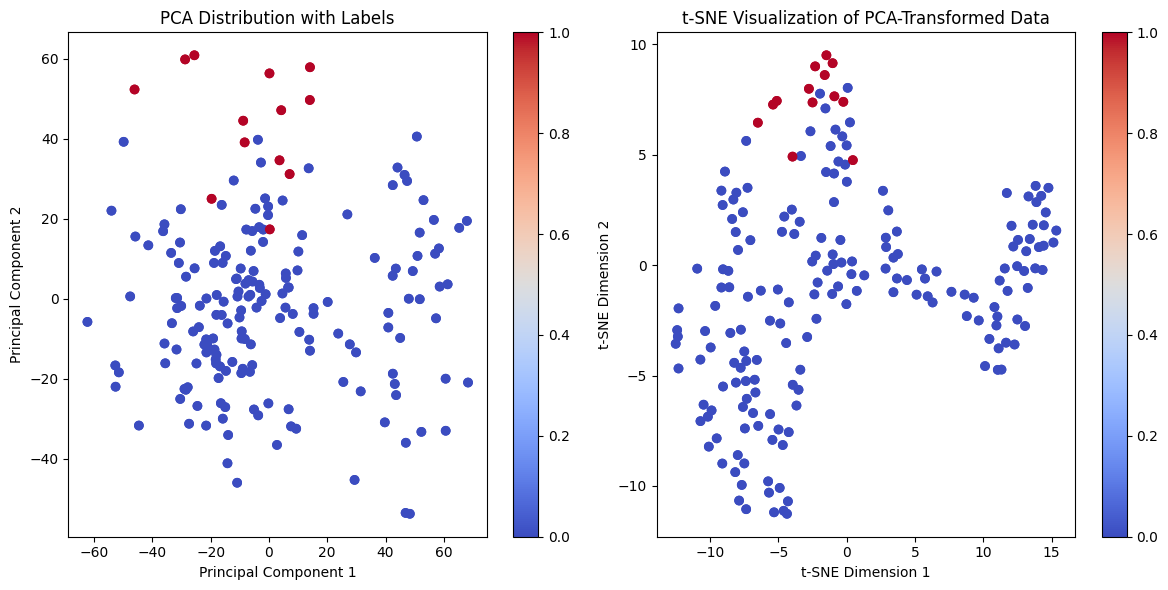

PCA Label Counts:
0    179
1     13
Name: Label, dtype: int64


t-SNE Label Counts:
0    179
1     13
Name: Label, dtype: int64


In [ ]:
plot_pca_tsne_visualizations(X_train,y_train)

###Klasifikasi Imbalance

Train ROC AUC: 1.0
Test Datasets


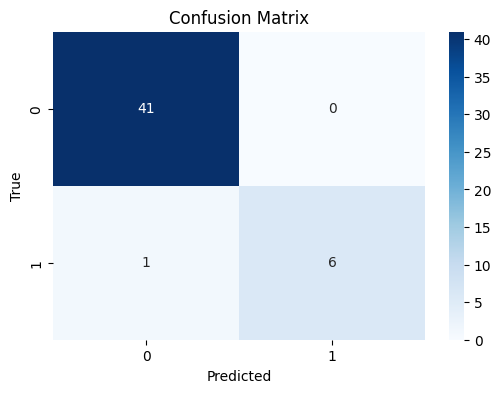

Sensitivity (Recall): 0.8571428571428571
Specificity: 1.0
Precision: 1.0
F1-Score: 0.923076923076923
Geometric Mean: 0.9258200997725514
Balanced Accuracy: 0.9285714285714286


In [ ]:
metrics = random_forest_classifier(X_train, y_train, X_test, y_test)

train_roc_auc_imbds3 = metrics['Train ROC AUC']
test_confusion_matrix_imbds3 = metrics['Test Confusion Matrix']
sensitivity_imbds3 = metrics['Sensitivity (Recall)']
specificity_imbds3 = metrics['Specificity']
precision_imbds3 = metrics['Precision']
f1score_imbds3 = metrics['F1-Score']
geometric_mean_imbds3 = metrics['Geometric Mean']
balanced_accuracy_imbds3 = metrics['Balanced Accuracy']

##Klasifikasi Balance

###SMOTE

In [ ]:
X_train_resampled, y_train_resampled = smote(X_train,y_train)

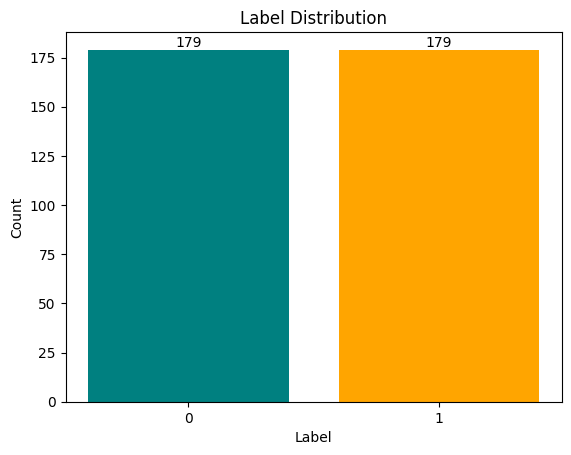

Label Counts:
0: 179
1: 179


In [ ]:
plot_label_distribution(y_train_resampled)

####Smote PCA-TSNE

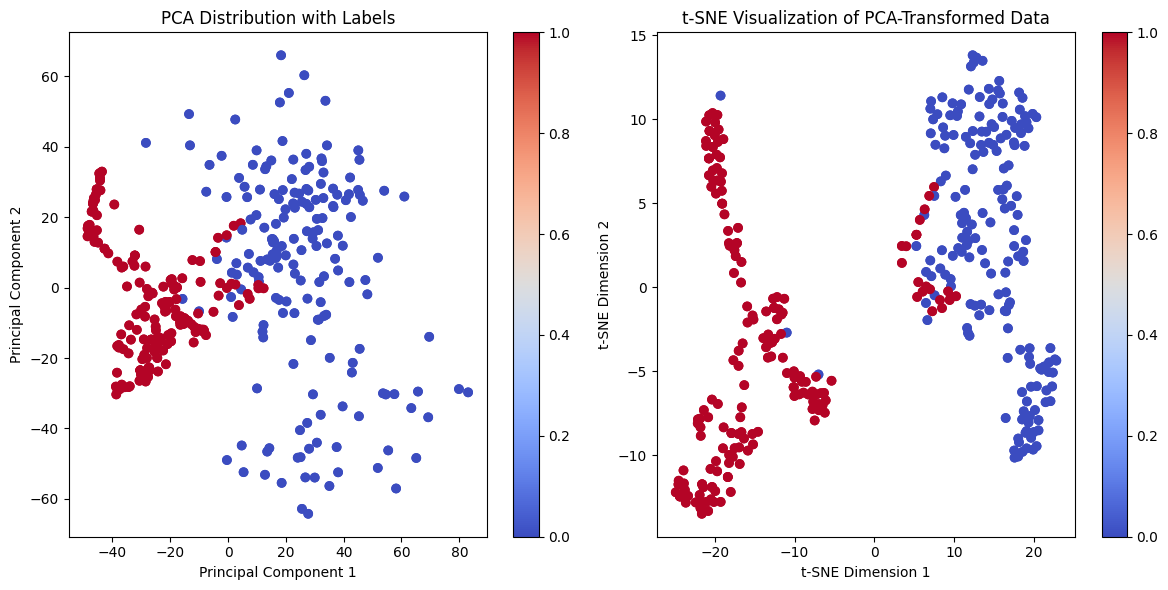

PCA Label Counts:
0    179
1    179
Name: Label, dtype: int64


t-SNE Label Counts:
0    179
1    179
Name: Label, dtype: int64


In [ ]:
plot_pca_tsne_visualizations(X_train_resampled, y_train_resampled)

####Klasifikasi SMOTE

Train ROC AUC: 1.0
Test Datasets


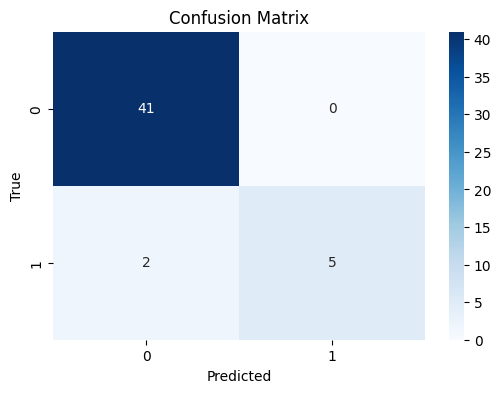

Sensitivity (Recall): 0.7142857142857143
Specificity: 1.0
Precision: 1.0
F1-Score: 0.8333333333333333
Geometric Mean: 0.8451542547285166
Balanced Accuracy: 0.8571428571428572


In [ ]:
metrics = random_forest_classifier(X_train_resampled, y_train_resampled, X_test, y_test)


train_roc_auc_smtds3 = metrics['Train ROC AUC']
test_confusion_matrix_smtds3 = metrics['Test Confusion Matrix']
sensitivity_smtds3 = metrics['Sensitivity (Recall)']
specificity_smtds3 = metrics['Specificity']
precision_smtds3 = metrics['Precision']
f1score_smtds3 = metrics['F1-Score']
geometric_mean_smtds3 = metrics['Geometric Mean']
balanced_accuracy_smtds3 = metrics['Balanced Accuracy']

###ADASYN

In [ ]:
X_train_resampled, y_train_resampled = adasyn(X_train,y_train)

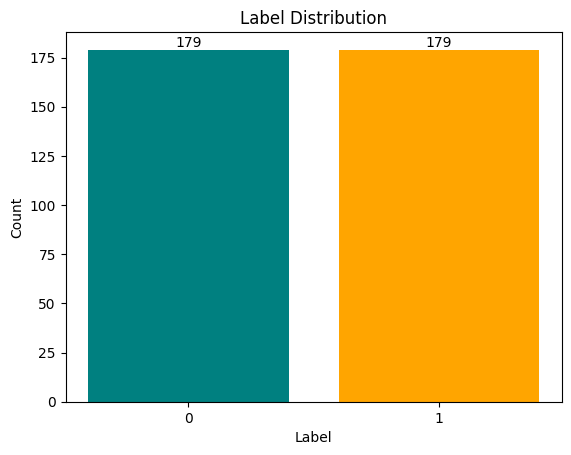

Label Counts:
0: 179
1: 179


In [ ]:
plot_label_distribution(y_train_resampled)

####ADASYN PCA-TSNE

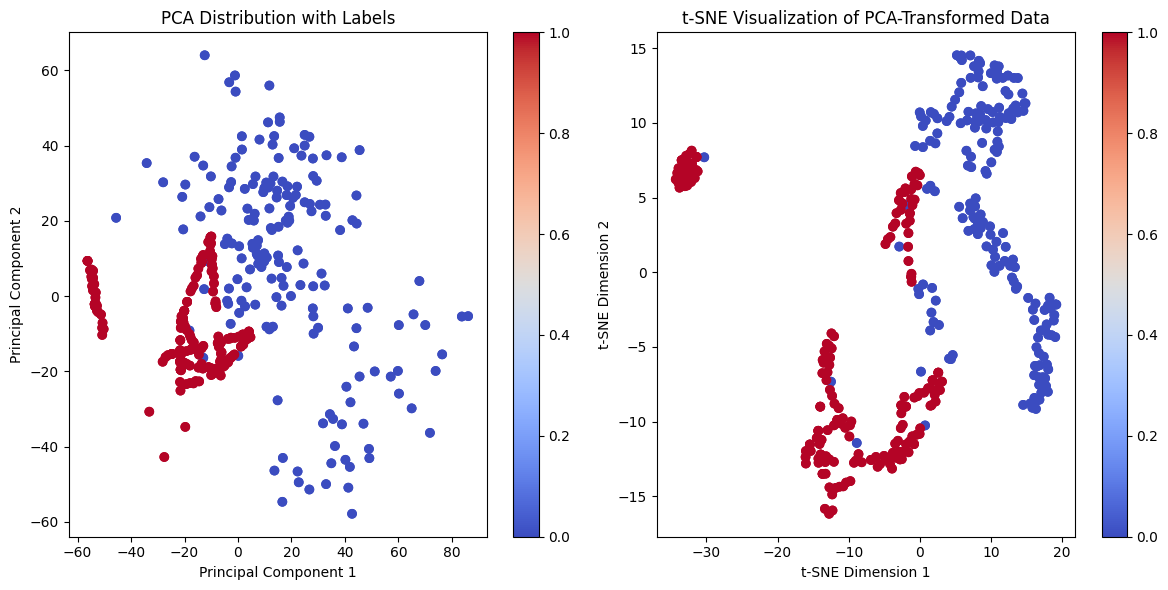

PCA Label Counts:
0    179
1    179
Name: Label, dtype: int64


t-SNE Label Counts:
0    179
1    179
Name: Label, dtype: int64


In [ ]:
plot_pca_tsne_visualizations(X_train_resampled, y_train_resampled)

####Klasifikasi ADASYN

Train ROC AUC: 1.0
Test Datasets


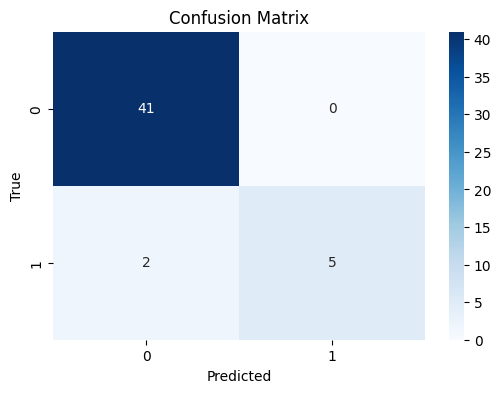

Sensitivity (Recall): 0.7142857142857143
Specificity: 1.0
Precision: 1.0
F1-Score: 0.8333333333333333
Geometric Mean: 0.8451542547285166
Balanced Accuracy: 0.8571428571428572


In [ ]:
metrics = random_forest_classifier(X_train_resampled, y_train_resampled, X_test, y_test)


train_roc_auc_adads3 = metrics['Train ROC AUC']
test_confusion_matrix_adads3 = metrics['Test Confusion Matrix']
sensitivity_adads3 = metrics['Sensitivity (Recall)']
specificity_adads3 = metrics['Specificity']
precision_adads3 = metrics['Precision']
f1score_adads3 = metrics['F1-Score']
geometric_mean_adads3 = metrics['Geometric Mean']
balanced_accuracy_adads3 = metrics['Balanced Accuracy']

#IR 12.28

##Read Data


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/TA_datasets/datatest/IR12.28.xlsx')

##Train test split

In [ ]:
X,y = label_encoding(data)

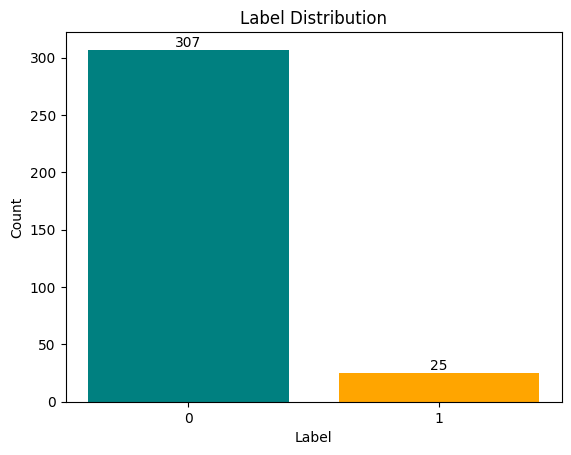

Label Counts:
0: 307
1: 25


In [ ]:
plot_label_distribution(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##BASE

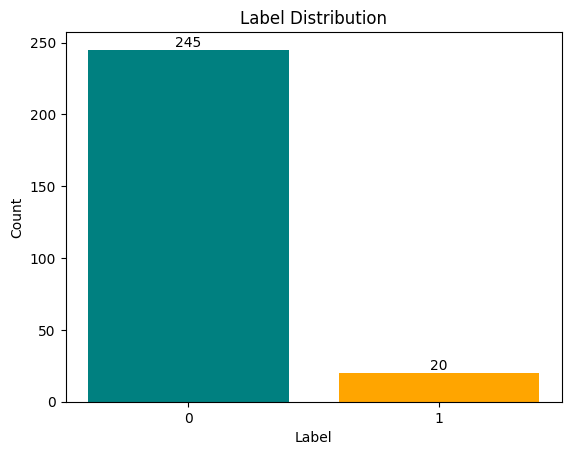

Label Counts:
0: 245
1: 20


In [ ]:
plot_label_distribution(y_train)

###Imbalance PCA - TSNE

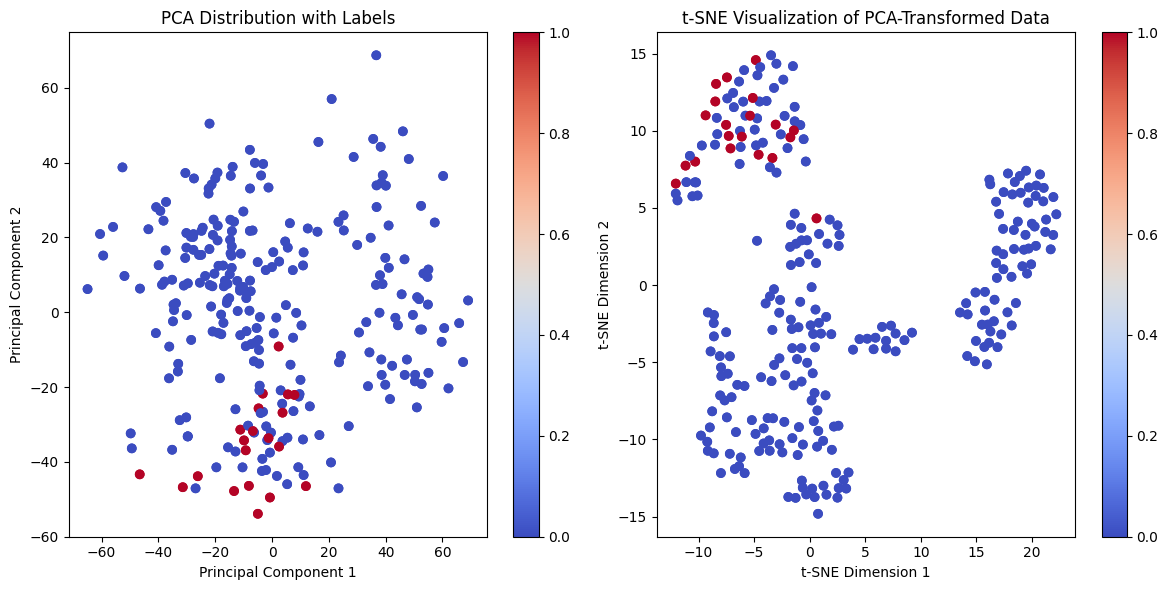

PCA Label Counts:
0    245
1     20
Name: Label, dtype: int64


t-SNE Label Counts:
0    245
1     20
Name: Label, dtype: int64


In [ ]:
plot_pca_tsne_visualizations(X_train,y_train)

###Klasifikasi Imbalance

Train ROC AUC: 1.0
Test Datasets


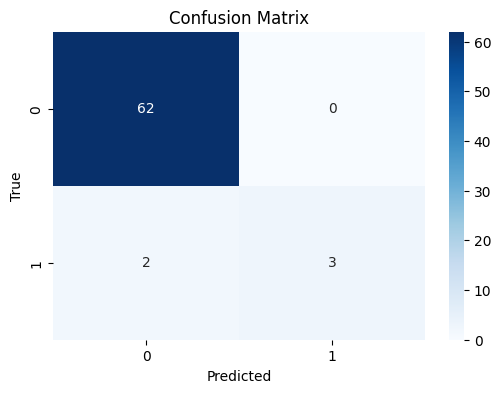

Sensitivity (Recall): 0.6
Specificity: 1.0
Precision: 1.0
F1-Score: 0.7499999999999999
Geometric Mean: 0.7745966692414834
Balanced Accuracy: 0.8


In [ ]:
metrics = random_forest_classifier(X_train, y_train, X_test, y_test)

train_roc_auc_imbds4 = metrics['Train ROC AUC']
test_confusion_matrix_imbds4 = metrics['Test Confusion Matrix']
sensitivity_imbds4 = metrics['Sensitivity (Recall)']
specificity_imbds4 = metrics['Specificity']
precision_imbds4 = metrics['Precision']
f1score_imbds4 = metrics['F1-Score']
geometric_mean_imbds4 = metrics['Geometric Mean']
balanced_accuracy_imbds4 = metrics['Balanced Accuracy']

##Klasifikasi Balance

###SMOTE

In [ ]:
X_train_resampled, y_train_resampled = smote(X_train,y_train)

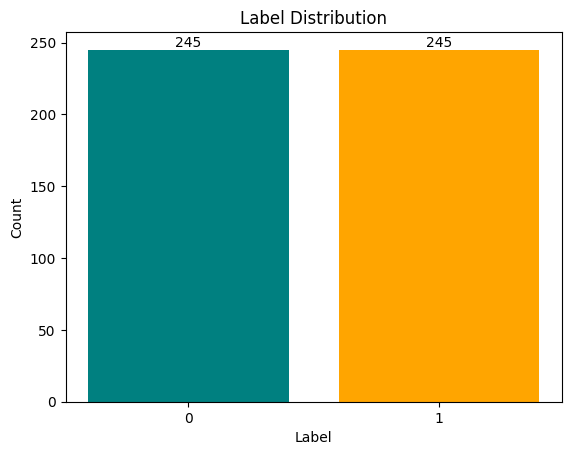

Label Counts:
0: 245
1: 245


In [ ]:
plot_label_distribution(y_train_resampled)

####Smote PCA-TSNE

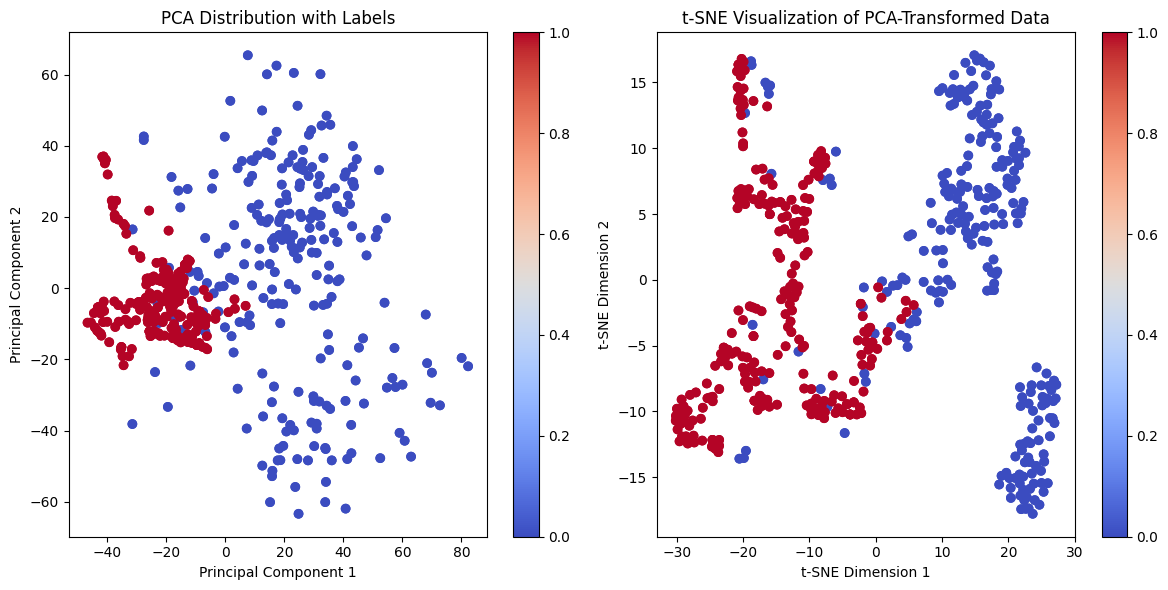

PCA Label Counts:
0    245
1    245
Name: Label, dtype: int64


t-SNE Label Counts:
0    245
1    245
Name: Label, dtype: int64


In [ ]:
plot_pca_tsne_visualizations(X_train_resampled, y_train_resampled)

####Klasifikasi SMOTE

Train ROC AUC: 1.0
Test Datasets


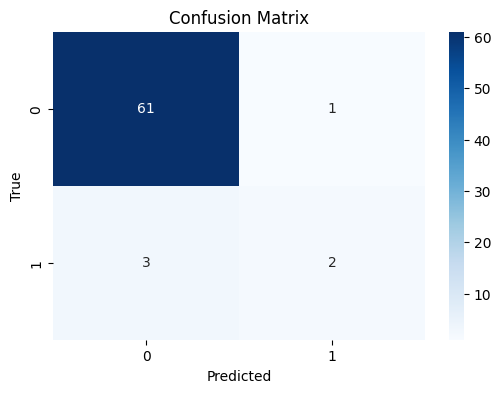

Sensitivity (Recall): 0.4
Specificity: 0.9838709677419355
Precision: 0.6666666666666666
F1-Score: 0.5
Geometric Mean: 0.6273343503242702
Balanced Accuracy: 0.6919354838709677


In [ ]:
metrics = random_forest_classifier(X_train_resampled, y_train_resampled, X_test, y_test)


train_roc_auc_smtds4 = metrics['Train ROC AUC']
test_confusion_matrix_smtds4 = metrics['Test Confusion Matrix']
sensitivity_smtds4 = metrics['Sensitivity (Recall)']
specificity_smtds4 = metrics['Specificity']
precision_smtds4 = metrics['Precision']
f1score_smtds4 = metrics['F1-Score']
geometric_mean_smtds4 = metrics['Geometric Mean']
balanced_accuracy_smtds4 = metrics['Balanced Accuracy']

###ADASYN

In [ ]:
X_train_resampled, y_train_resampled = adasyn(X_train,y_train)

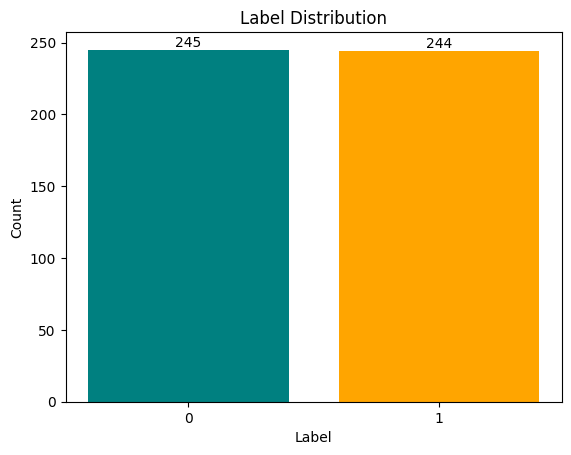

Label Counts:
0: 245
1: 244


In [ ]:
plot_label_distribution(y_train_resampled)

####ADASYN PCA-TSNE

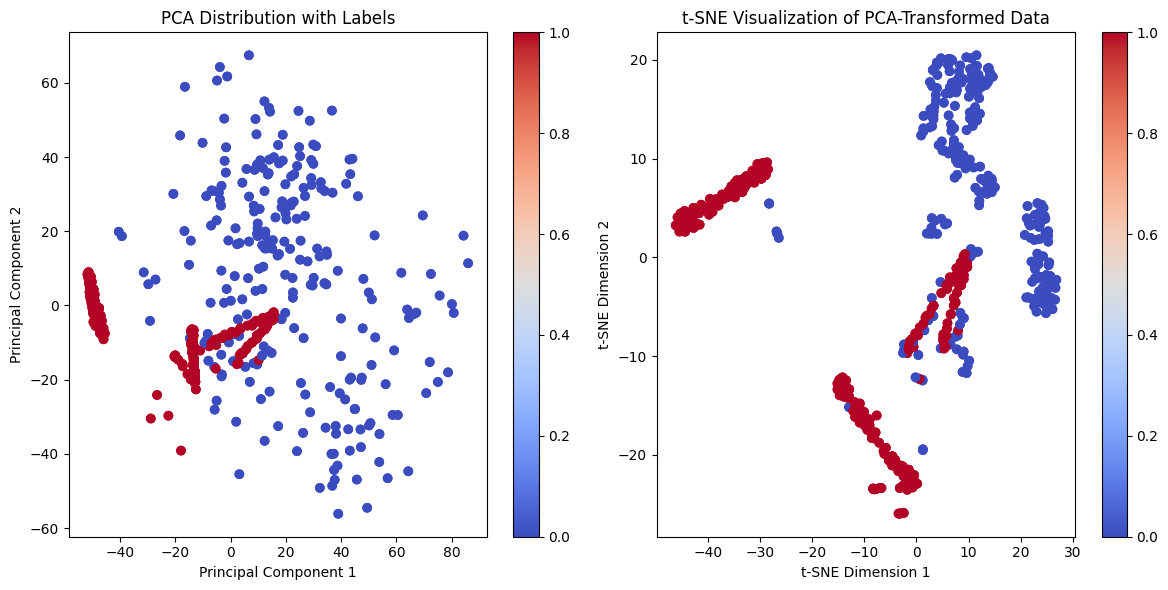

PCA Label Counts:
0    245
1    244
Name: Label, dtype: int64


t-SNE Label Counts:
0    245
1    244
Name: Label, dtype: int64


In [ ]:
plot_pca_tsne_visualizations(X_train_resampled, y_train_resampled)

####Klasifikasi ADASYN

Train ROC AUC: 1.0
Test Datasets


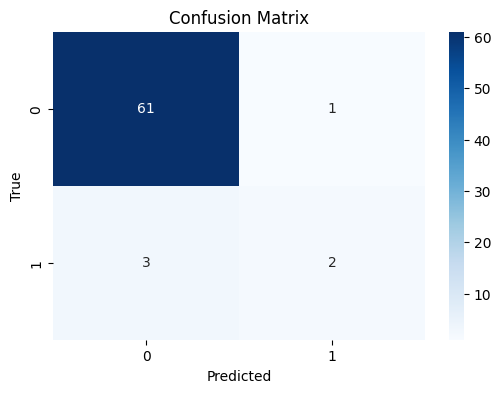

Sensitivity (Recall): 0.4
Specificity: 0.9838709677419355
Precision: 0.6666666666666666
F1-Score: 0.5
Geometric Mean: 0.6273343503242702
Balanced Accuracy: 0.6919354838709677


In [ ]:
metrics = random_forest_classifier(X_train_resampled, y_train_resampled, X_test, y_test)


train_roc_auc_adads4 = metrics['Train ROC AUC']
test_confusion_matrix_adads4 = metrics['Test Confusion Matrix']
sensitivity_adads4 = metrics['Sensitivity (Recall)']
specificity_adads4 = metrics['Specificity']
precision_adads4 = metrics['Precision']
f1score_adads4 = metrics['F1-Score']
geometric_mean_adads4 = metrics['Geometric Mean']
balanced_accuracy_adads4 = metrics['Balanced Accuracy']

#IR 13

##Read Data


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/TA_datasets/datatest/IR13.xlsx')

In [ ]:
data['Label'].value_counts()

negative    260
positive     20
Name: Label, dtype: int64

##Train test split

In [ ]:
X,y = label_encoding(data)

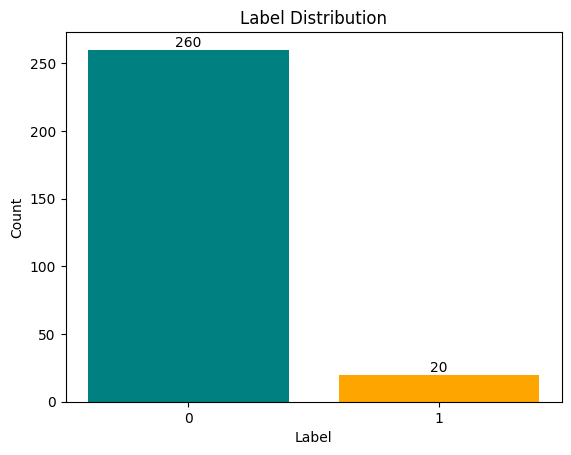

Label Counts:
0: 260
1: 20


In [ ]:
plot_label_distribution(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##BASE

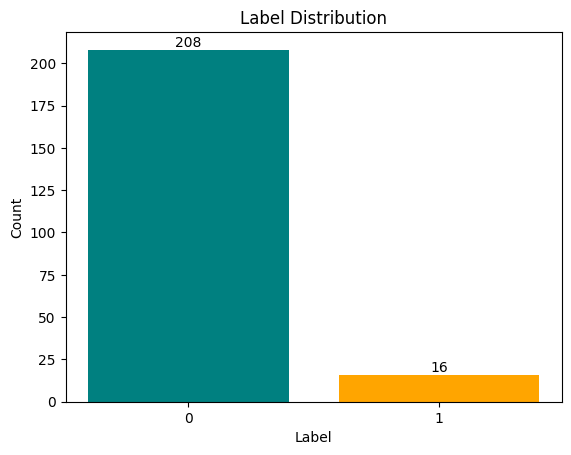

Label Counts:
0: 208
1: 16


In [ ]:
plot_label_distribution(y_train)

###Imbalance PCA - TSNE

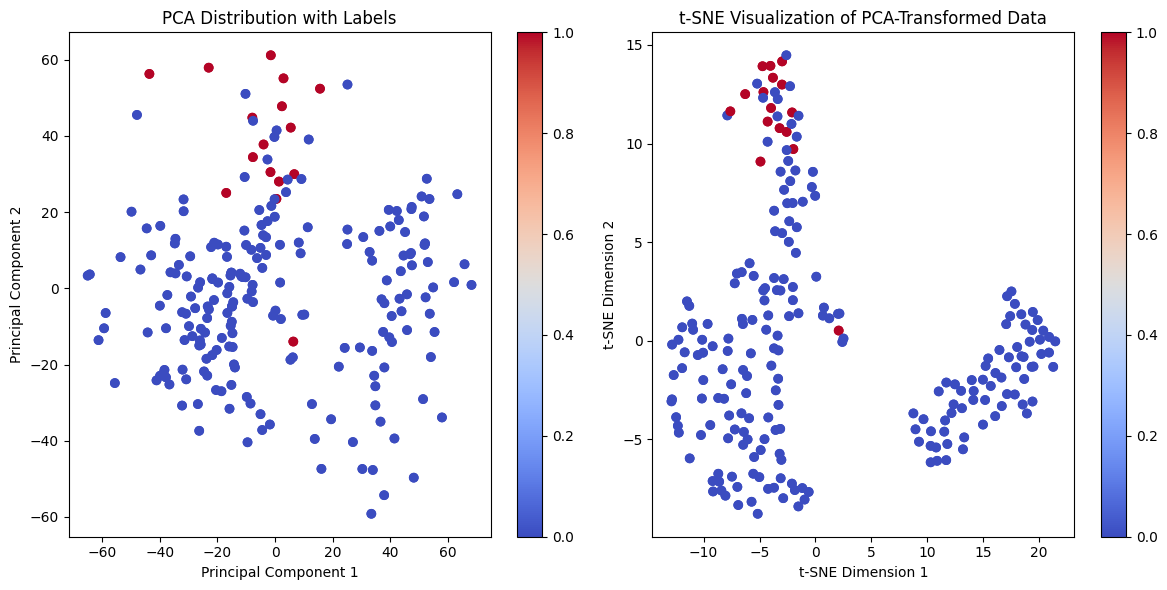

PCA Label Counts:
0    208
1     16
Name: Label, dtype: int64


t-SNE Label Counts:
0    208
1     16
Name: Label, dtype: int64


In [ ]:
plot_pca_tsne_visualizations(X_train,y_train)

###Klasifikasi Imbalance

Train ROC AUC: 1.0
Test Datasets


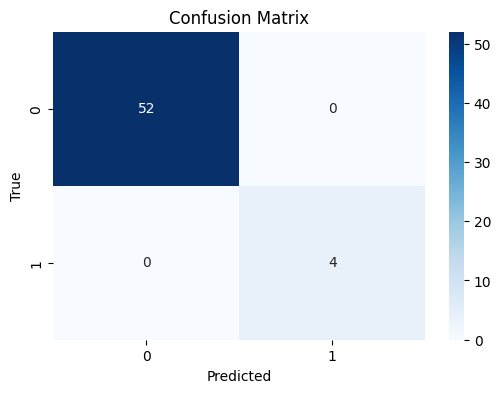

Sensitivity (Recall): 1.0
Specificity: 1.0
Precision: 1.0
F1-Score: 1.0
Geometric Mean: 1.0
Balanced Accuracy: 1.0


In [ ]:
metrics = random_forest_classifier(X_train, y_train, X_test, y_test)

train_roc_auc_imbds5 = metrics['Train ROC AUC']
test_confusion_matrix_imbds5 = metrics['Test Confusion Matrix']
sensitivity_imbds5 = metrics['Sensitivity (Recall)']
specificity_imbds5 = metrics['Specificity']
precision_imbds5 = metrics['Precision']
f1score_imbds5 = metrics['F1-Score']
geometric_mean_imbds5 = metrics['Geometric Mean']
balanced_accuracy_imbds5 = metrics['Balanced Accuracy']

##Klasifikasi Balance

###SMOTE

In [ ]:
X_train_resampled, y_train_resampled = smote(X_train,y_train)

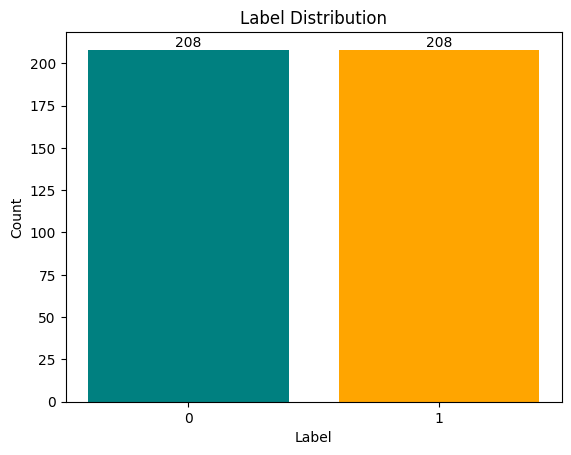

Label Counts:
0: 208
1: 208


In [ ]:
plot_label_distribution(y_train_resampled)

####Smote PCA-TSNE

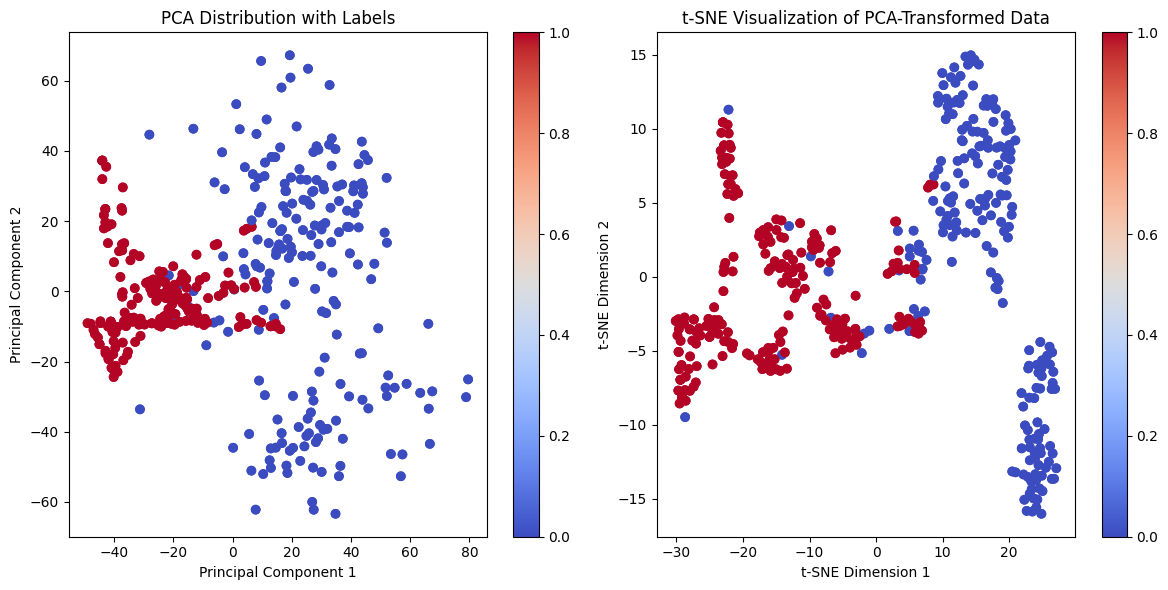

PCA Label Counts:
0    208
1    208
Name: Label, dtype: int64


t-SNE Label Counts:
0    208
1    208
Name: Label, dtype: int64


In [ ]:
plot_pca_tsne_visualizations(X_train_resampled, y_train_resampled)

####Klasifikasi SMOTE

Train ROC AUC: 1.0
Test Datasets


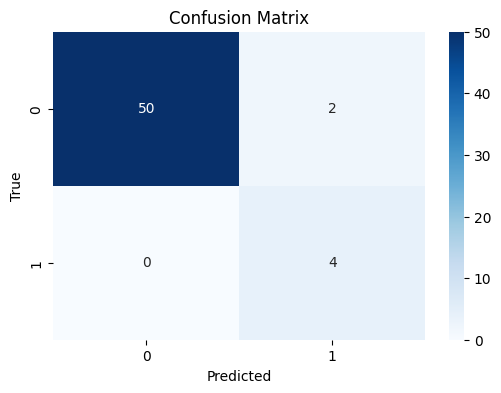

Sensitivity (Recall): 1.0
Specificity: 0.9615384615384616
Precision: 0.6666666666666666
F1-Score: 0.8
Geometric Mean: 0.9805806756909202
Balanced Accuracy: 0.9807692307692308


In [ ]:
metrics = random_forest_classifier(X_train_resampled, y_train_resampled, X_test, y_test)


train_roc_auc_smtds5 = metrics['Train ROC AUC']
test_confusion_matrix_smtds5 = metrics['Test Confusion Matrix']
sensitivity_smtds5 = metrics['Sensitivity (Recall)']
specificity_smtds5 = metrics['Specificity']
precision_smtds5 = metrics['Precision']
f1score_smtds5 = metrics['F1-Score']
geometric_mean_smtds5 = metrics['Geometric Mean']
balanced_accuracy_smtds5 = metrics['Balanced Accuracy']

###ADASYN

In [ ]:
X_train_resampled, y_train_resampled = adasyn(X_train,y_train)

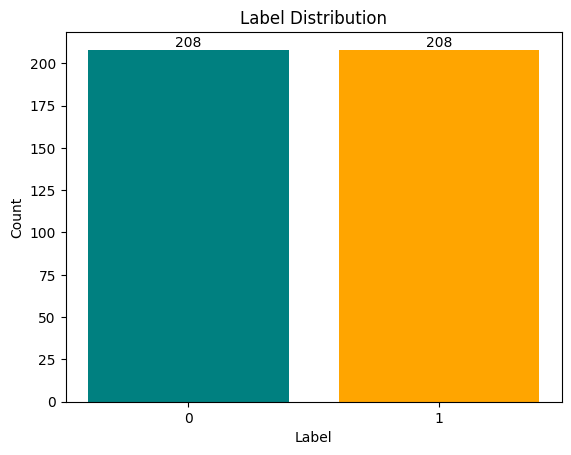

Label Counts:
0: 208
1: 208


In [ ]:
plot_label_distribution(y_train_resampled)

####ADASYN PCA-TSNE

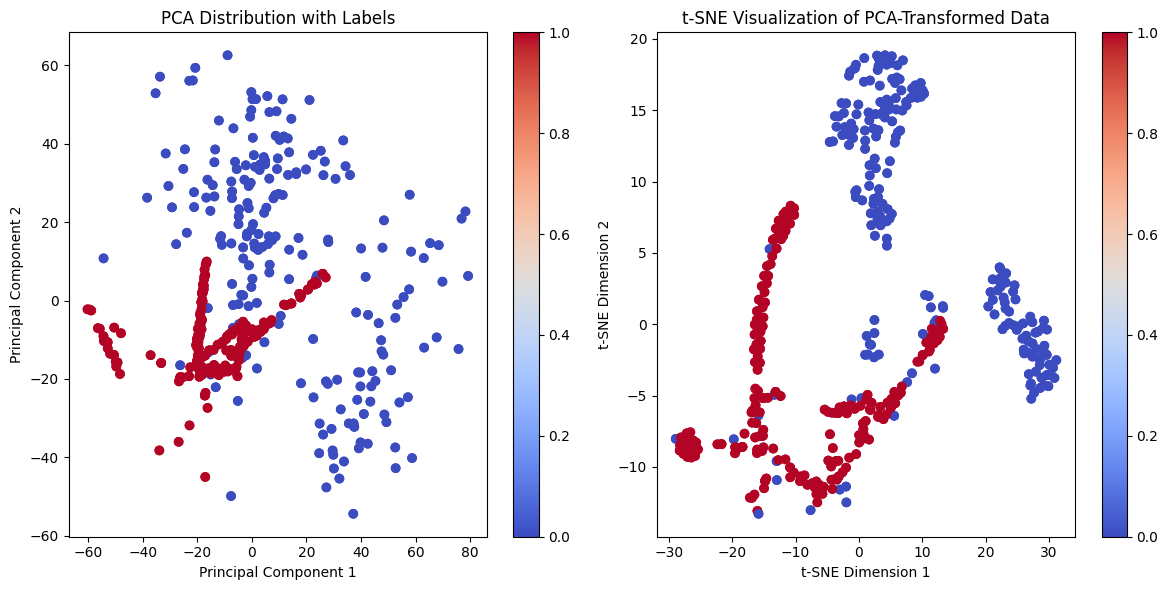

PCA Label Counts:
0    208
1    208
Name: Label, dtype: int64


t-SNE Label Counts:
0    208
1    208
Name: Label, dtype: int64


In [ ]:
plot_pca_tsne_visualizations(X_train_resampled, y_train_resampled)

####Klasifikasi ADASYN

Train ROC AUC: 1.0
Test Datasets


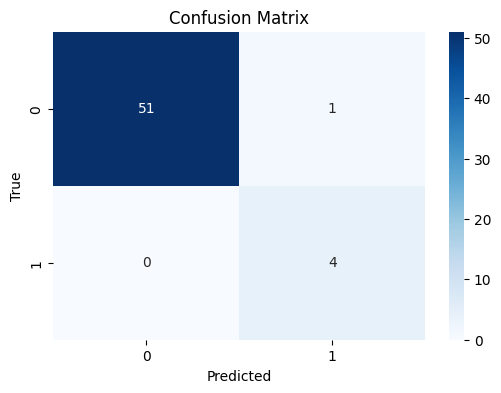

Sensitivity (Recall): 1.0
Specificity: 0.9807692307692307
Precision: 0.8
F1-Score: 0.888888888888889
Geometric Mean: 0.9903379376602871
Balanced Accuracy: 0.9903846153846154


In [ ]:
metrics = random_forest_classifier(X_train_resampled, y_train_resampled, X_test, y_test)


train_roc_auc_adads5 = metrics['Train ROC AUC']
test_confusion_matrix_adads5 = metrics['Test Confusion Matrix']
sensitivity_adads5 = metrics['Sensitivity (Recall)']
specificity_adads5 = metrics['Specificity']
precision_adads5 = metrics['Precision']
f1score_adads5 = metrics['F1-Score']
geometric_mean_adads5 = metrics['Geometric Mean']
balanced_accuracy_adads5 = metrics['Balanced Accuracy']

#Kesimpulan

##Table

In [ ]:
import pandas as pd

# Create a list of dictionaries with the scores for each dataset and technique
scores_list = [
    {
        'Dataset': 'Imbalanced DS1',
        'Train ROC AUC': train_roc_auc_imb_ds1,
        'Sensitivity (Recall)': sensitivity_imb_ds1,
        'Specificity': specificity_imb_ds1,
        'Precision': precision_imb_ds1,
        'F1-Score': f1score_imb_ds1,
        'Geometric Mean': geometric_mean_imb_ds1,
        'Balanced Accuracy': balanced_accuracy_imb_ds1
    },
    {
        'Dataset': 'SMOTE DS1',
        'Train ROC AUC': train_roc_auc_smt_ds1,
        'Sensitivity (Recall)': sensitivity_smt_ds1,
        'Specificity': specificity_smt_ds1,
        'Precision': precision_smt_ds1,
        'F1-Score': f1score_smt_ds1,
        'Geometric Mean': geometric_mean_smt_ds1,
        'Balanced Accuracy': balanced_accuracy_smt_ds1
    },
    {
        'Dataset': 'ADASYN DS1',
        'Train ROC AUC': train_roc_auc_ada_ds1,
        'Sensitivity (Recall)': sensitivity_ada_ds1,
        'Specificity': specificity_ada_ds1,
        'Precision': precision_ada_ds1,
        'F1-Score': f1score_ada_ds1,
        'Geometric Mean': geometric_mean_ada_ds1,
        'Balanced Accuracy': balanced_accuracy_ada_ds1
    },
    {
        'Dataset': 'Imbalanced DS2',
        'Train ROC AUC': train_roc_auc_imbds2,
        'Sensitivity (Recall)': sensitivity_imbds2,
        'Specificity': specificity_imbds2,
        'Precision': precision_imbds2,
        'F1-Score': f1score_imbds2,
        'Geometric Mean': geometric_mean_imbds2,
        'Balanced Accuracy': balanced_accuracy_imbds2
    },
    {
        'Dataset': 'SMOTE DS2',
        'Train ROC AUC': train_roc_auc_smtds2,
        'Sensitivity (Recall)': sensitivity_smtds2,
        'Specificity': specificity_smtds2,
        'Precision': precision_smtds2,
        'F1-Score': f1score_smtds2,
        'Geometric Mean': geometric_mean_smtds2,
        'Balanced Accuracy': balanced_accuracy_smtds2
    },
    {
        'Dataset': 'ADASYN DS2',
        'Train ROC AUC': train_roc_auc_adads2,
        'Sensitivity (Recall)': sensitivity_adads2,
        'Specificity': specificity_adads2,
        'Precision': precision_adads2,
        'F1-Score': f1score_adads2,
        'Geometric Mean': geometric_mean_adads2,
        'Balanced Accuracy': balanced_accuracy_adads2
    },
    {
        'Dataset': 'Imbalanced DS3',
        'Train ROC AUC': train_roc_auc_imbds3,
        'Sensitivity (Recall)': sensitivity_imbds3,
        'Specificity': specificity_imbds3,
        'Precision': precision_imbds3,
        'F1-Score': f1score_imbds3,
        'Geometric Mean': geometric_mean_imbds3,
        'Balanced Accuracy': balanced_accuracy_imbds3
    },
    {
        'Dataset': 'SMOTE DS3',
        'Train ROC AUC': train_roc_auc_smtds3,
        'Sensitivity (Recall)': sensitivity_smtds3,
        'Specificity': specificity_smtds3,
        'Precision': precision_smtds3,
        'F1-Score': f1score_smtds3,
        'Geometric Mean': geometric_mean_smtds3,
        'Balanced Accuracy': balanced_accuracy_smtds3
    },
    {
        'Dataset': 'ADASYN DS3',
        'Train ROC AUC': train_roc_auc_adads3,
        'Sensitivity (Recall)': sensitivity_adads3,
        'Specificity': specificity_adads3,
        'Precision': precision_adads3,
        'F1-Score': f1score_adads3,
        'Geometric Mean': geometric_mean_adads3,
        'Balanced Accuracy': balanced_accuracy_adads3
    },
    {
        'Dataset': 'Imbalanced DS4',
        'Train ROC AUC': train_roc_auc_imbds4,
        'Sensitivity (Recall)': sensitivity_imbds4,
        'Specificity': specificity_imbds4,
        'Precision': precision_imbds4,
        'F1-Score': f1score_imbds4,
        'Geometric Mean': geometric_mean_imbds4,
        'Balanced Accuracy': balanced_accuracy_imbds4
    },
    {
        'Dataset': 'SMOTE DS4',
        'Train ROC AUC': train_roc_auc_smtds4,
        'Sensitivity (Recall)': sensitivity_smtds4,
        'Specificity': specificity_smtds4,
        'Precision': precision_smtds4,
        'F1-Score': f1score_smtds4,
        'Geometric Mean': geometric_mean_smtds4,
        'Balanced Accuracy': balanced_accuracy_smtds4
    },
    {
        'Dataset': 'ADASYN DS4',
        'Train ROC AUC': train_roc_auc_adads4,
        'Sensitivity (Recall)': sensitivity_adads4,
        'Specificity': specificity_adads4,
        'Precision': precision_adads4,
        'F1-Score': f1score_adads4,
        'Geometric Mean': geometric_mean_adads4,
        'Balanced Accuracy': balanced_accuracy_adads4
    },
    {
        'Dataset': 'Imbalanced DS5',
        'Train ROC AUC': train_roc_auc_imbds5,
        'Sensitivity (Recall)': sensitivity_imbds5,
        'Specificity': specificity_imbds5,
        'Precision': precision_imbds5,
        'F1-Score': f1score_imbds5,
        'Geometric Mean': geometric_mean_imbds5,
        'Balanced Accuracy': balanced_accuracy_imbds5
    },
    {
        'Dataset': 'SMOTE DS5',
        'Train ROC AUC': train_roc_auc_smtds5,
        'Sensitivity (Recall)': sensitivity_smtds5,
        'Specificity': specificity_smtds5,
        'Precision': precision_smtds5,
        'F1-Score': f1score_smtds5,
        'Geometric Mean': geometric_mean_smtds5,
        'Balanced Accuracy': balanced_accuracy_smtds5
    },
    {
        'Dataset': 'ADASYN DS5',
        'Train ROC AUC': train_roc_auc_adads5,
        'Sensitivity (Recall)': sensitivity_adads5,
        'Specificity': specificity_adads5,
        'Precision': precision_adads5,
        'F1-Score': f1score_adads5,
        'Geometric Mean': geometric_mean_adads5,
        'Balanced Accuracy': balanced_accuracy_adads5
    },

]

# Create a DataFrame from the scores list
scores_df = pd.DataFrame(scores_list)

# Display the table
scores_df


,Dataset,Train ROC AUC,Sensitivity (Recall),Specificity,Precision,F1-Score,Geometric Mean,Balanced Accuracy
0,Imbalanced DS1,1.0,0.666667,0.973684,0.666667,0.666667,0.805682,0.820175
1,SMOTE DS1,1.0,1.000000,0.973684,0.750000,0.857143,0.986754,0.986842
2,ADASYN DS1,1.0,1.000000,0.973684,0.750000,0.857143,0.986754,0.986842
3,Imbalanced DS2,1.0,0.750000,1.000000,1.000000,0.857143,0.866025,0.875000
4,SMOTE DS2,1.0,1.000000,0.975000,0.800000,0.888889,0.987421,0.987500
5,ADASYN DS2,1.0,1.000000,0.950000,0.666667,0.800000,0.974679,0.975000
6,Imbalanced DS3,1.0,0.857143,1.000000,1.000000,0.923077,0.925820,0.928571
7,SMOTE DS3,1.0,0.714286,1.000000,1.000000,0.833333,0.845154,0.857143
8,ADASYN DS3,1.0,0.714286,1.000000,1.000000,0.833333,0.845154,0.857143
9,Imbalanced DS4,1.0,0.600000,1.000000,1.000000,0.750000,0.774597,0.800000


##Graph

In [ ]:
# Filter the scores_df DataFrame for the imbalance technique
imbalance_df = scores_df[scores_df['Dataset'].str.contains('Imbalanced')].copy()
imbalance_df.reset_index(drop=True, inplace=True)

# Filter the scores_df DataFrame for the SMOTE technique
smote_df = scores_df[scores_df['Dataset'].str.contains('SMOTE')].copy()
smote_df.reset_index(drop=True, inplace=True)

# Filter the scores_df DataFrame for the ADASYN technique
adasyn_df = scores_df[scores_df['Dataset'].str.contains('ADASYN')].copy()
adasyn_df.reset_index(drop=True, inplace=True)


<ipython-input-90-df86033bd0d8>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 0].set_xticklabels(scores_df['Dataset'], rotation=45)
<ipython-input-90-df86033bd0d8>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 1].set_xticklabels(imbalance_df['Dataset'], rotation=45)
<ipython-input-90-df86033bd0d8>:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, 0].set_xticklabels(smote_df['Dataset'], rotation=45)
<ipython-input-90-df86033bd0d8>:65: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, 1].set_xticklabels(adasyn_df['Dataset'], rotation=45)


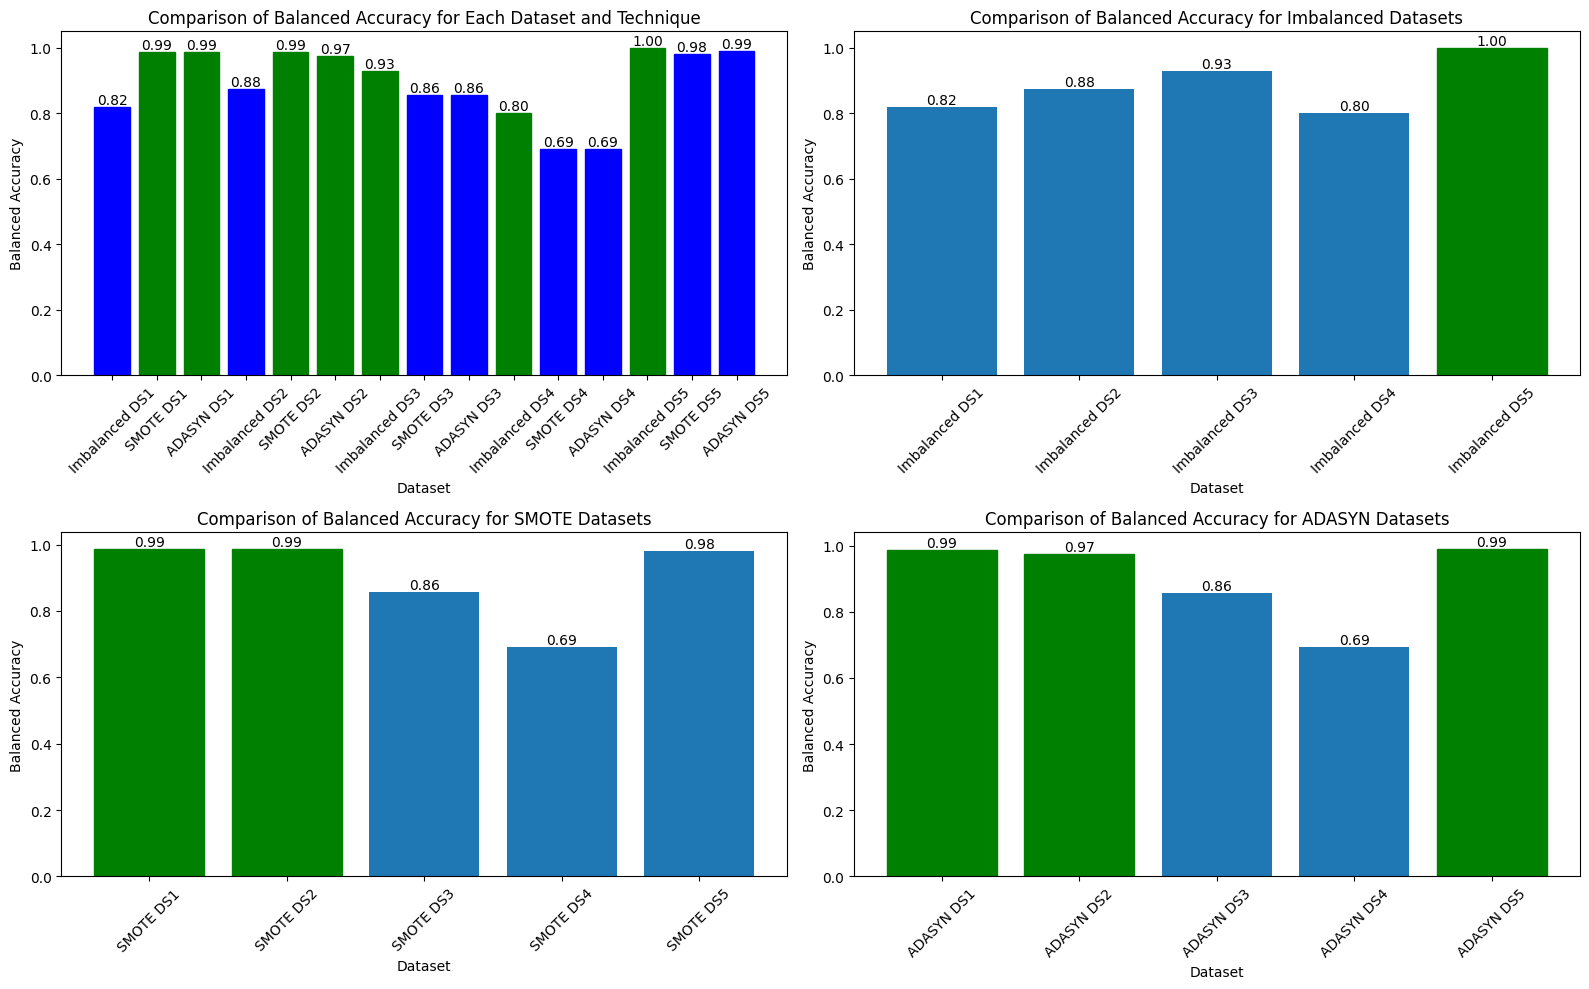

In [ ]:
# Create a 2x2 grid for the subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# Bar plot for the overall comparison
axs[0, 0].bar(scores_df['Dataset'], scores_df['Balanced Accuracy'])
axs[0, 0].set_xticklabels(scores_df['Dataset'], rotation=45)
axs[0, 0].set_xlabel('Dataset')
axs[0, 0].set_ylabel('Balanced Accuracy')
axs[0, 0].set_title('Comparison of Balanced Accuracy for Each Dataset and Technique')

# Specify the colors for the bars
color_map = {
    2: 'green',
    3: 'green',
    5: 'green',
    6: 'green',
    7: 'green',
    10: 'green',
    13: 'green'
}

# Add the value for each bar and set the colors
for i, v in enumerate(scores_df['Balanced Accuracy']):
    bar = axs[0, 0].bar(i, v)
    if i+1 in color_map:
        bar[0].set_color(color_map[i+1])
    else:
        bar[0].set_color('blue')  # Set other bars to blue (you can change this color as desired)
    axs[0, 0].text(i, v, f'{v:.2f}', ha='center', va='bottom')


# Bar plot for the imbalance technique
axs[0, 1].bar(imbalance_df['Dataset'], imbalance_df['Balanced Accuracy'])
axs[0, 1].set_xticklabels(imbalance_df['Dataset'], rotation=45)
axs[0, 1].set_xlabel('Dataset')
axs[0, 1].set_ylabel('Balanced Accuracy')
axs[0, 1].set_title('Comparison of Balanced Accuracy for Imbalanced Datasets')

# Add the value for each bar
for i, v in enumerate(imbalance_df['Balanced Accuracy']):
    axs[0, 1].text(i, v, f'{v:.2f}', ha='center', va='bottom')

# Set the color for the specified bar
bars = axs[0, 1].get_children()
bars[4].set_color('green')

# Bar plot for the SMOTE technique
axs[1, 0].bar(smote_df['Dataset'], smote_df['Balanced Accuracy'])
axs[1, 0].set_xticklabels(smote_df['Dataset'], rotation=45)
axs[1, 0].set_xlabel('Dataset')
axs[1, 0].set_ylabel('Balanced Accuracy')
axs[1, 0].set_title('Comparison of Balanced Accuracy for SMOTE Datasets')

# Add the value for each bar
for i, v in enumerate(smote_df['Balanced Accuracy']):
    axs[1, 0].text(i, v, f'{v:.2f}', ha='center', va='bottom')

# Set the color for specified bars
for i, bar in enumerate(axs[1, 0].get_children()):
    if i in [0, 1]:
        bar.set_color('green')

# Bar plot for the ADASYN technique
axs[1, 1].bar(adasyn_df['Dataset'], adasyn_df['Balanced Accuracy'])
axs[1, 1].set_xticklabels(adasyn_df['Dataset'], rotation=45)
axs[1, 1].set_xlabel('Dataset')
axs[1, 1].set_ylabel('Balanced Accuracy')
axs[1, 1].set_title('Comparison of Balanced Accuracy for ADASYN Datasets')

# Add the value for each bar
for i, v in enumerate(adasyn_df['Balanced Accuracy']):
    axs[1, 1].text(i, v, f'{v:.2f}', ha='center', va='bottom')

# Set the color for specified bars
for i, bar in enumerate(axs[1, 1].get_children()):
    if i in [0, 1, 4]:
        bar.set_color('green')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the combined figure
plt.show()
